In [1]:
# 2018-06-21
# A. Pendleton
# Plotting PCA of breeds+Zoey at GPhocs loci SNP sites

In [2]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import sys
import numpy as np
import matplotlib.patches as patches
import gzip
import fileinput
import glob
from scipy import stats
import re
from matplotlib_venn import venn3, venn3_circles
from collections import OrderedDict
import seaborn as sns

def count_lines(f):
    lineCount = 0
    with open(f, 'r') as f:
        for line in f:
            lineCount += 1
        return lineCount
def runCMD(cmd):
    val = subprocess.Popen(cmd, shell=True).wait()
    if val == 0:
        pass
    else:
        print ('command failed')
        print (cmd)
        sys.exit(1)
# TO REMOVE TOP AND RIGHT AXIS OF PLOTS
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

In [3]:
# Define working directory 

In [4]:
wkDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/PCA/input/WholeGenomeSNPs_GPhocsLoci/'

## Create sample lists to "keep" for PCA
### List 1 = breeds+village dogs
### List 2 = breeds only 

In [9]:
sampleInfoFile = wkDir + 'input/' + 'CanineGenomeDatabase_2.txt'

for line in open(sampleInfoFile,'r'):
    line=line.rstrip().split('\t')
    sampleID = line[6]
    sampleType = line[3]
    
    if sampleID not in sampleDict.keys():
        sampleDict[sampleID] = sampleType


Added 364 samples to sampleDict


In [95]:
#file used to process/filter out samples based on seq depth at SNP sites for heterozygosity analysis:
hetSamples = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/Heterozygosity/input/samples_to_plot_ordered.txt'

keepVillageBreeds = open(wkDir + 'keepsamples_VillageBreeds.txt','w')
keepBreeds = open(wkDir + 'keepsamples_Breeds.txt','w')
keepBreeds_NoDingoNGSDBasenji = open(wkDir + 'keepsamples_Breeds_NoDingoNGSDBasenji.txt','w')
keepBreeds_NoAncientBreeds = open(wkDir + 'keepsamples_Breeds_NoAncientBreeds.txt','w')

sampleDict = {}
breedDict = {} #sample = key, breed = value
villageDict = {} #sample = key, population = value
breeds = {} #breed = key, samples = values

nonancients = []

for line in open(hetSamples,'r'):
    if 'SampleID' in line:
        continue
    line=line.rstrip().split('\t')
    sampleID = line[0]
    sampleType = line[2]
    breedOrPop = line[1].replace(' ','_')
    
    if 'Village' in sampleType or 'Breed' in sampleType:
        keepVillageBreeds.write('%s\n' % sampleID)
    else:
        continue
        
    if 'Breed' in sampleType:
        keepBreeds.write('%s\n' % sampleID)
        breedDict[sampleID] = breedOrPop
        if breedOrPop not in breeds:
            breeds[breedOrPop] = []
        breeds[breedOrPop].append(sampleID)
        #FOR REMOVING BASENJI,NGSD,DINGOES
        if 'Basenji' not in breedOrPop and 'Guinea' not in breedOrPop and 'Dingo' not in breedOrPop:
            keepBreeds_NoDingoNGSDBasenji.write('%s\n' % sampleID)
        
        #Write out sample ID's for non-ancients/outliers    
        ancients = ['Basenji','New_Guinea_Singing_Dog','Dingo','Siberian_Husky','Tibetan_Mastiff','Greenland_Dog','Shar-Pei',
                    'Afghan_Hound','Saluki','Shih-Tzu_(Normal)','Pekingnese','Chow_Chow','East_Siberian_Laika','Korean_Jindo_Dog'
                   'Alaskan_Malamute','Shiba_Inu']    
        
        if breedOrPop not in ancients and sampleID != 'mal01' and sampleID != 'jin01':
        #if 'Basenji' not in breedOrPop and 'Guinea' not in breedOrPop and 'Dingo' not in breedOrPop and 'Husky' not in breedOrPop and 'Tibet' not in breedOrPop or 'Greenland' not in breedOrPop and 'Shar-Pei' not in breedOrPop and 'Malamute' not in breedOrPop and 'Akita' not in breedOrPop and 'Afghan' not in breedOrPop and 'Saluki' not in breedOrPop:    
            print(breedOrPop)
            keepBreeds_NoAncientBreeds.write('%s\n' % sampleID)
    
    if 'Village' in sampleType:
        villageDict[sampleID] = breedOrPop
    
    sampleDict[sampleID] = sampleType

    

keepVillageBreeds.close()
keepBreeds.close()
keepBreeds_NoDingoNGSDBasenji.close()
keepBreeds_NoAncientBreeds.close()

print('Added %i samples to sampleDict' % len(sampleDict.keys()))


Airedale_Terrier
Airedale_Terrier
Australian_Cattle_Dog
Australian_Shepherd
Beagle
Beagle
Belgian_Sheepdog
Belgian_Turvuren
Belgium_Malinois
Berger_Picard
Berger_Picard
Bernese_Mountain_Dog
Black_&_Tan_Coonhound
Black_Russian_Terrier
Bloodhound
Border_Collie
Border_Collie
Border_Terrier
Border_Terrier
Boxer
Brittany_Spaniel
Bulldog
Bulldog
Cane_Corso
Caucasian_Ovcharka
Cavalier_King_Charles_Spaniel
Chihuahua
Chihuahua
Chinese_Crested_Terrier
Chinese_Crested_Terrier
Chinook
Clumber_Spaniel
Cocker_Spaniel
Cocker_Spaniel
Doberman
Doberman
English_Cocker_Spaniel
English_Cocker_Spaniel
English_Mastiff
English_Pointer
English_Setter
English_Springer_Spaniel
English_Springer_Spaniel
Finnish_Lapphund
Flat-coated_Retreiver
Flat-coated_Retreiver
Galgo
German_Shepherd
German_Shepherd
Golden_Retriever
Golden_Retriever
Gordon_Setter
Great_Dane
Great_Dane
Great_Pyrenees
Grey_Norwegian_Elkhound
Greyhound_Racing
Irish_Wolfhound
Istrian_Shorthaired_Hound
Italian_Greyhound
Italian_Greyhound
Jack_Russell

### Get Colors for PLOT -- color by Breed

In [62]:
#### Get Breed Colors
colorDict = {}

for line in open('/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/PCA/plots/WholeGenomeSNPs_GPhocsLoci/BreedColors.txt','r'):
    if 'Breed' in line: #skip header
        continue
    line=line.rstrip().split()
    breed = line[0]
    color = line[1]
    colorDict[breed] = color


## Read in PCA results

In [96]:

resultsDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/PCA/results/WholeGenomeSNPs_GPhocsLoci/'
#BREEDS ONLY:
#eigFile = resultsDir + 'WholeGenome_Gphocs_Breeds_Biallelic_0.05Missing.pca.eigenvec'
#BREEDS - NO NGSD,DINGO,BASENJI
#eigFile = resultsDir + 'WholeGenome_Gphocs_Breeds_Biallelic_0.05Missing_NoDingoNGSDBasenji.pca.eigenvec'
#NO ANCIENT BREEDS
eigFile = resultsDir + 'WholeGenome_Gphocs_Breeds_Biallelic_0.05Missing_NoAncientBreeds.pca.eigenvec'

pcaDict = {}
pcaDICT = {}
varianceList = []

for i in range(1,20):
    pcaDICT[i] = []

for line in open(eigFile,'r'):
    line = line.rstrip().split()
    if 'eig' in line[0]:
        for i in range(1,20):
            varianceList.append(float(line[i]))
    else:
        sampleID = line[0].split(':')[0]
        pcaDict[sampleID] = []
        for i in range(1,20):
            pcaDict[sampleID].append(float(line[i]))
            pcaDICT[i]
print('Added PCA results for %i samples' % len(pcaDict.keys()))


Added PCA results for 109 samples


## Plot PCA

IndexError: list index out of range

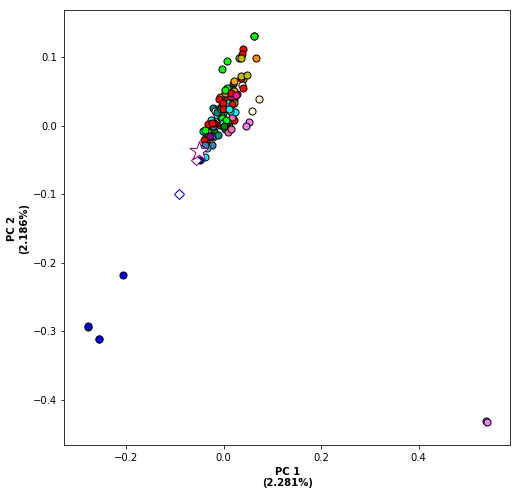

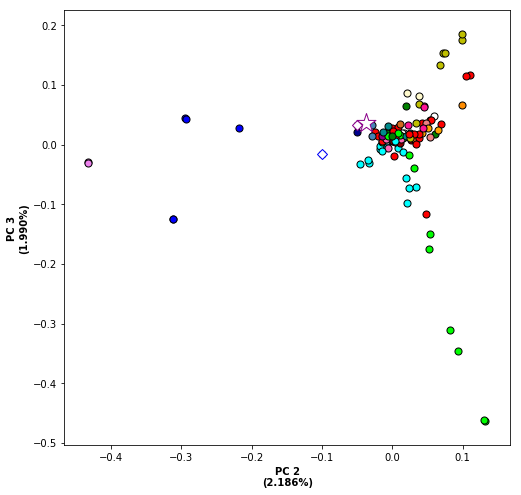

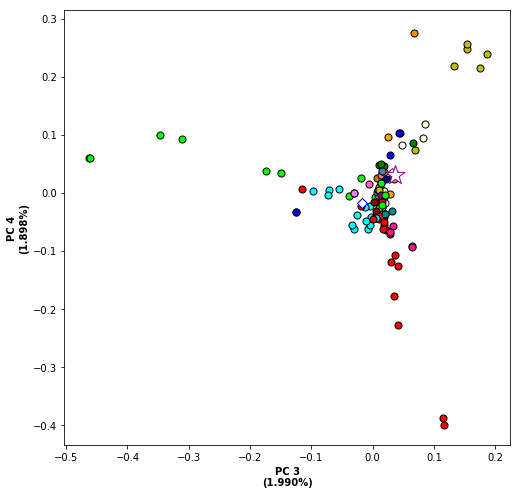

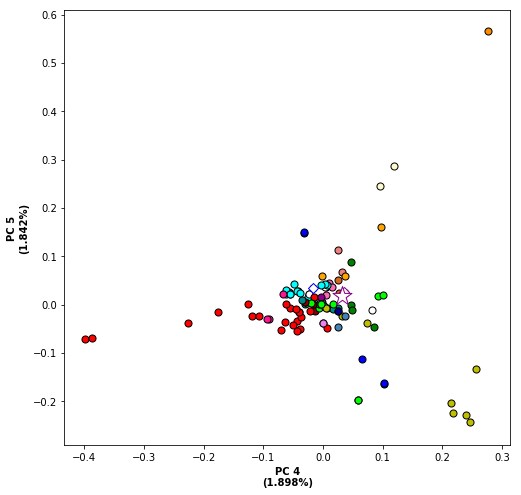

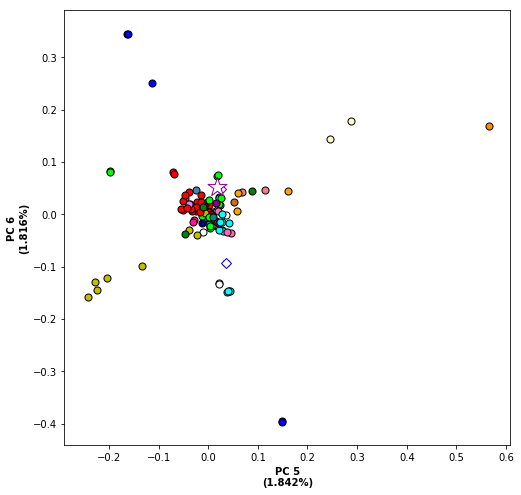

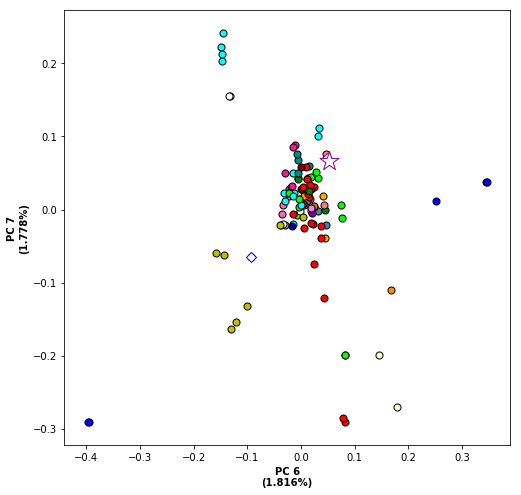

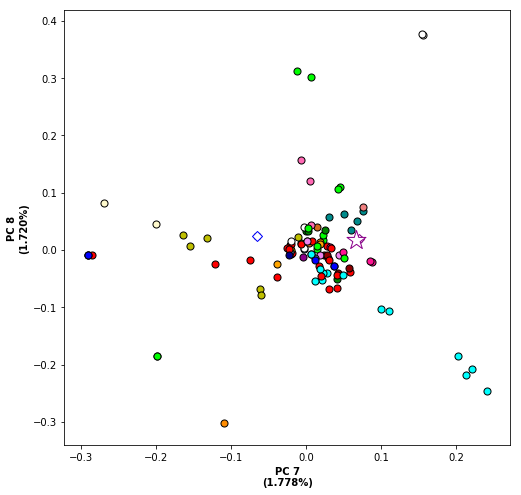

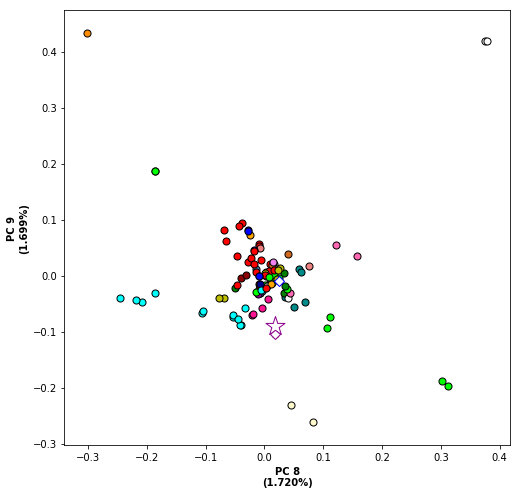

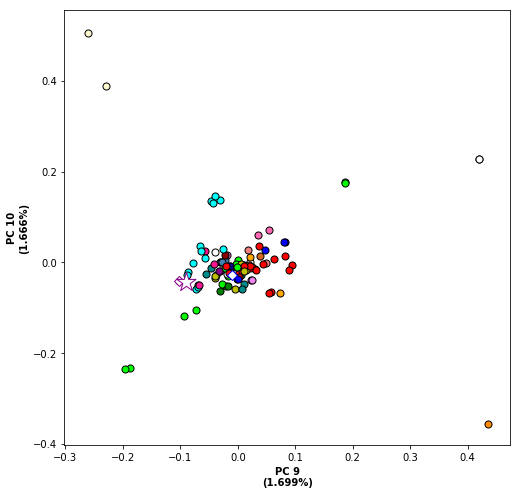

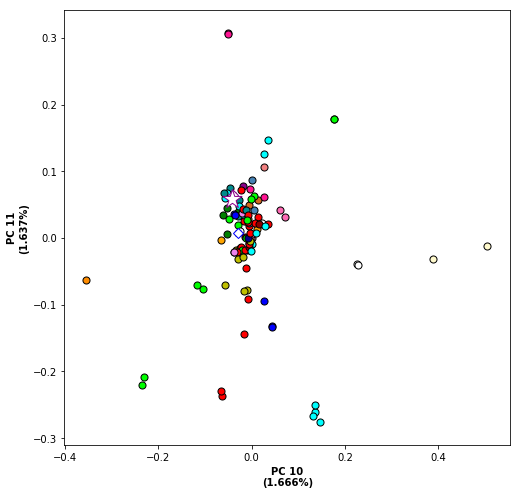

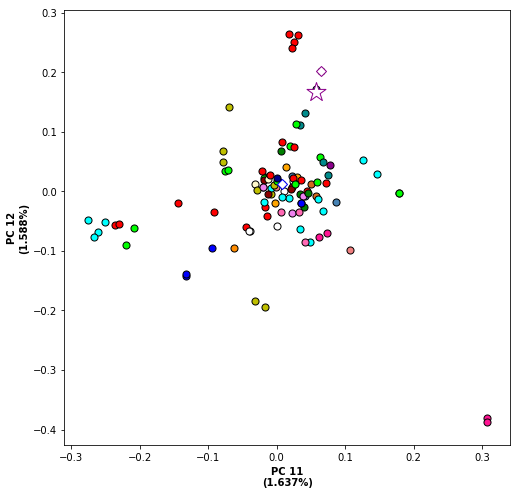

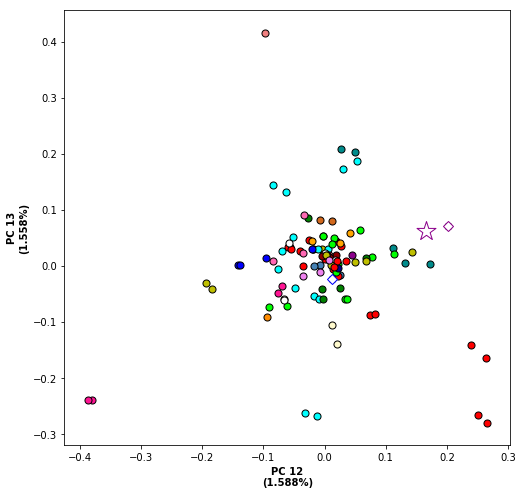

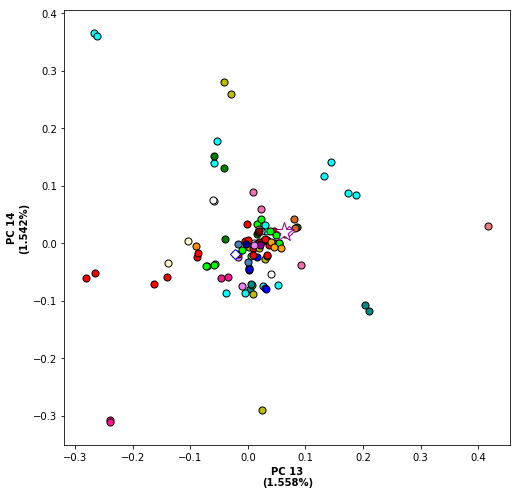

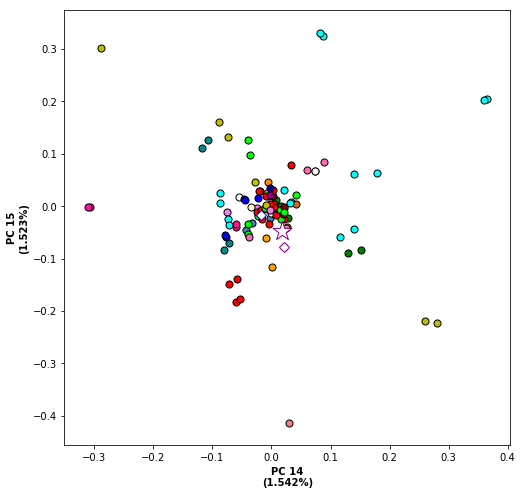

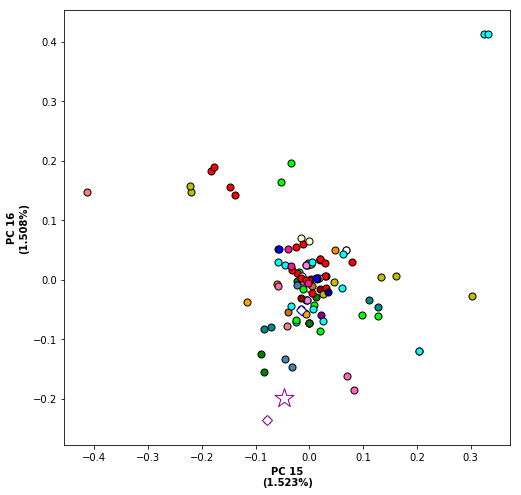

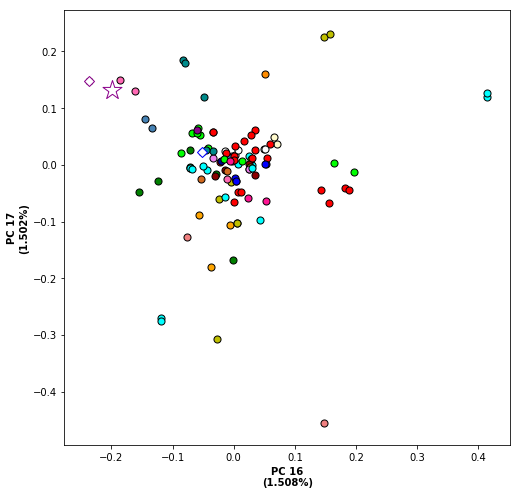

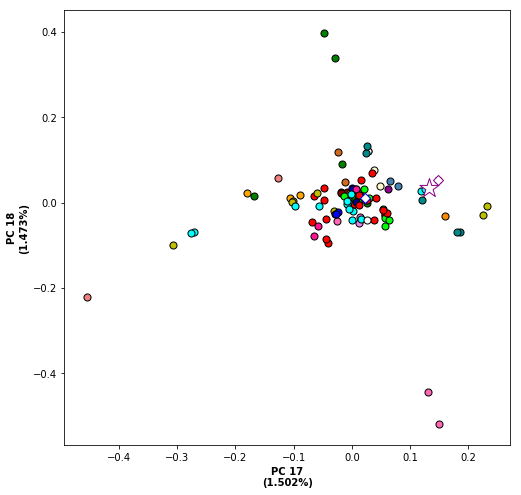

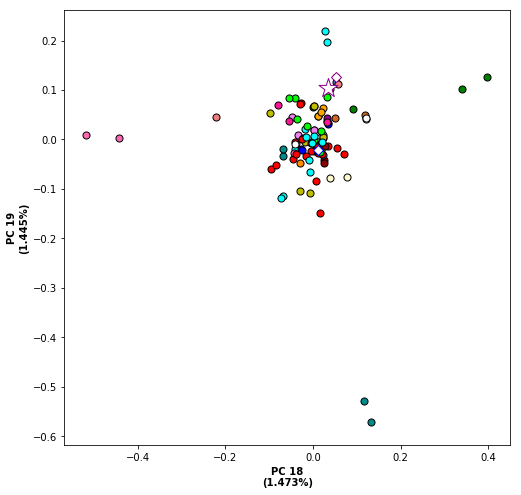

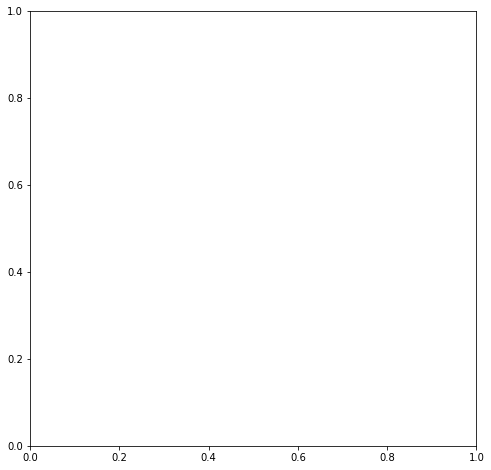

In [98]:
plotDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/PCA/plots/' + 'WholeGenomeSNPs_GPhocsLoci/'

for i in range(0,19):
    x, y = [], []
    
    #Create new figure for each PC rotation being compared
    fig, ax = plt.subplots(figsize=(8,8))

    for sample in pcaDict.keys():
        x.append(pcaDict[sample][i])
        y.append(pcaDict[sample][i+1])

        #PLOT BREED DOGS
        if sample in breedDict.keys():
            #Get sample's breed
            breed = breedDict[sample]

            #Get color for breed
            if breed in colorDict.keys():
                COLOR = colorDict[breed]
            else:
                COLOR = 'black'
                print('SAMPLE-',sample)
            if COLOR == 'yellow':
                print(sample)
                
            #PLOT
            if 'Dingo' in breed:
                continue
            plt.scatter(pcaDict[sample][i],pcaDict[sample][i+1],color=COLOR,s=50,edgecolors='black')

        #PLOT VILLAGE DOGS
        if sample in villageDict.keys():
            continue
            #Get sample's breed
            pop = villageDict[sample]
            """#PLOT
            plt.scatter(pcaDict[sample][i],pcaDict[sample][i+1],color=white,s=250,edgecolors='black',marker='^')"""

    #All breeds
    breedsOfInterest = ['Boxer','Great_Dane']
    #No NGSD or boxers
    #breedsOfInterest = ['Great_Dane']
    for breed in breedsOfInterest:
        for sample in breeds[breed]:
            if 'zoey' in sample:
                continue
            COLOR = colorDict[breed]
            plt.scatter(pcaDict[sample][i],pcaDict[sample][i+1],color='white',s=50,edgecolors=COLOR,marker='D')

    #Add Zoey back in
    plt.scatter(pcaDict['zoey'][i],pcaDict['zoey'][i+1],color='white',s=400,edgecolors='darkmagenta',marker='*')
    
    #Tailor the plot
    plt.xlabel('PC %i\n(%.3f%%)' % ((int(i)+1),varianceList[i]),fontweight='bold')
    plt.ylabel('PC %i\n(%.3f%%)' % ((int(i)+2),varianceList[i+1]),fontweight='bold')
    
    #All breeds
    #pltFile = plotDir + 'PC%i_PC%i_GPhocsLoci_BreedsOnly.pdf' % ((int(i)+1),(int(i)+2))
    #No NGSD,Basenji,Dingo
    #pltFile = plotDir + 'PC%i_PC%i_ShannonBreeds_BreedsOnly_NoDingoNGSDBasenji.pdf' % ((int(i)+1),(int(i)+2))
    #NO ANCIENT BREEDS
    pltFile = plotDir + 'PC%i_PC%i_GPhocsLoci_NoAncientBreeds.pdf' % ((int(i)+1),(int(i)+2))

    plt.savefig(pltFile)
    
    
    #break